# ED Analysis

In [148]:
#import Library of python
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import os, sys
sys.path.append("../src")
sys.path.append('../')
import warnings
warnings.filterwarnings('ignore')
from src.file_handler import File_handler
file_handler=File_handler()

In [149]:
# Then load the raw sales data
# Then load the raw sales data
data_path = 'train.csv'
version = 'vt1'
repo = 'https://github.com/BirhanuGebisa/Pharmaceutical_sales_prediction/data'
memory=False

train_df = File_handler.read_dvc(data_path, version, repo,memory)
# Finally load the test data
data_path2 = 'test.csv'
version = 'vt4'
test_df = File_handler.read_dvc(data_path, version, repo,memory)


Error occur Failed to clone repo 'https://github.com/BirhanuGebisa/Pharmaceutical_sales_prediction/data' to '/tmp/tmpx9ua37jjdvc-clone'
Error occur Failed to clone repo 'https://github.com/BirhanuGebisa/Pharmaceutical_sales_prediction/data' to '/tmp/tmpcs89n1vzdvc-clone'


In [150]:
train_df = pd.read_csv('../data/train.csv')
print(len(train_df))
train_df.head()

1017209


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [151]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [152]:
train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [153]:
#Converting timestamp dtype into datetime using pd.to_datetime This is Necessary, so we can aggregate data into defined time period example month/day etc..
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null datetime64[ns]
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [154]:
train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [155]:
train_df['SchoolHoliday'].value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [156]:
train_df['SchoolHoliday'].groupby(train_df['StateHoliday']).unique()

StateHoliday
0    [0, 1]
0    [1, 0]
a    [0, 1]
b    [1, 0]
c       [1]
Name: SchoolHoliday, dtype: object

In [157]:
train_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [158]:
train_df.Store=train_df.Store.astype('int64')

In [159]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

### Test Dataset

In [160]:
test_df = pd.read_csv('../data/test.csv')
print(len(test_df))
test_df.head()

41088


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [161]:
test_df.Store=test_df.Store.astype('int64')

In [162]:
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [163]:
test_df.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [164]:
test_df=test_df.ffill()

### Store Dataset

In [165]:
store_df=pd.read_csv("../data/store.csv")
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [166]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [167]:
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [168]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [169]:
store_df['Promo2'].value_counts()

1    571
0    544
Name: Promo2, dtype: int64

CompetitionDistance

In [170]:
store_df[store_df["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [171]:
#CompetitionDistance is not null but CompetitionOpenSinceMonth is null
store_df[(~store_df["CompetitionDistance"].isnull() & store_df["CompetitionOpenSinceMonth"].isnull())].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


In [172]:
#CompetitionDistance is not null but CompetitionOpenSinceYear is null
store_df[(~store_df["CompetitionDistance"].isnull() & store_df["CompetitionOpenSinceYear"].isnull())].head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"


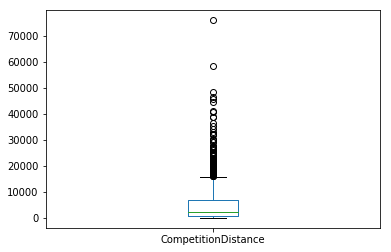

In [173]:
store_df['CompetitionDistance'].plot.box()

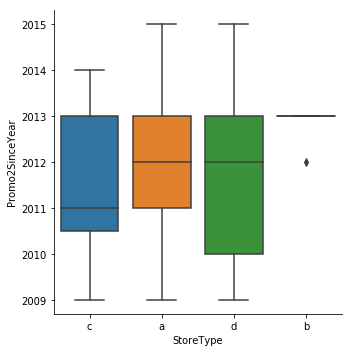

In [174]:
sns.catplot(x="StoreType", y="Promo2SinceYear", kind="box", data=store_df.query("Promo2SinceYear!=0"))

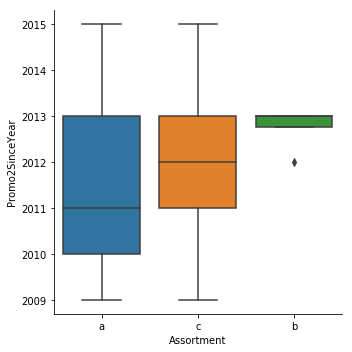

In [175]:
sns.catplot(x="Assortment", y="Promo2SinceYear", kind="box", data=store_df.query("Promo2SinceYear!=0"))

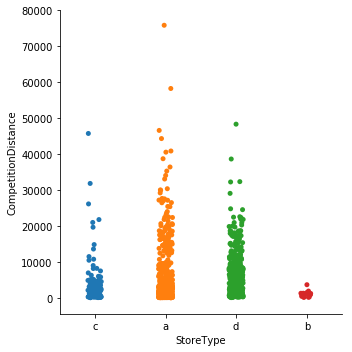

In [176]:
sns.catplot(x="StoreType", y="CompetitionDistance", data=store_df)

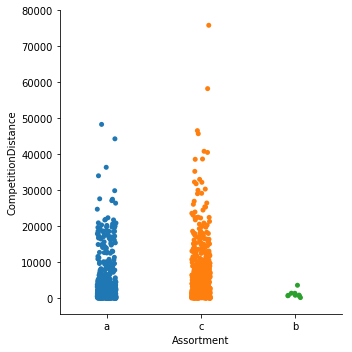

In [177]:
sns.catplot(x="Assortment", y="CompetitionDistance", data=store_df)

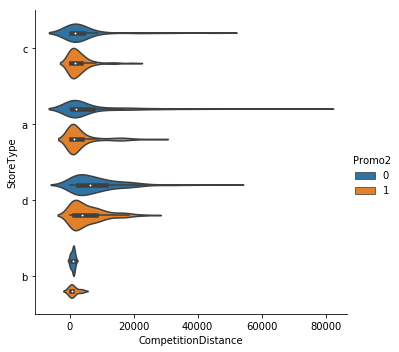

In [178]:
sns.catplot(x="CompetitionDistance", y="StoreType", hue="Promo2",
            kind="violin", data=store_df)

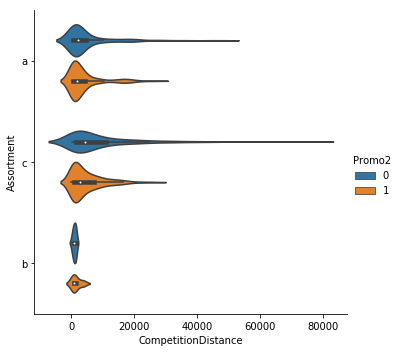

In [179]:
sns.catplot(x="CompetitionDistance", y="Assortment", hue="Promo2",
            kind="violin", data=store_df)

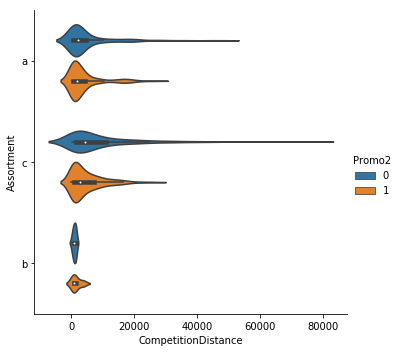

In [180]:
sns.catplot(x="CompetitionDistance", y="Assortment", hue="Promo2",
            kind="violin", data=store_df)

### Merge train and store

In [181]:
train_df.rename(columns = {'Store_id':'Store'}, inplace=True)
merged_train= store_df.merge(train_df, on='Store')
merged_train.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [182]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
Store                        1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null float64
PromoInterval                509178 non-null object
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null datetime64[ns]
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 n

In [183]:
merged_train.isnull().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

Save train and store merge datset

In [184]:
merged_train.to_csv("../data/merged_train.csv", index=False)

### Test and Store

In [185]:
test_df.rename(columns = {'Store_id':'Store'}, inplace=True)
merged_test = store_df.merge(test_df, on='Store')
merged_test.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,4,2015-09-17,1.0,1,0,0
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,857,3,2015-09-16,1.0,1,0,0
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1713,2,2015-09-15,1.0,1,0,0
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2569,1,2015-09-14,1.0,1,0,0
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3425,7,2015-09-13,0.0,0,0,0


In [186]:
merged_test.to_csv("../data/merged_test.csv", index=False)

In [187]:
merged_test=merged_test.ffill()
merged_test.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,4,2015-09-17,1.0,1,0,0
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,857,3,2015-09-16,1.0,1,0,0
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1713,2,2015-09-15,1.0,1,0,0
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2569,1,2015-09-14,1.0,1,0,0
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3425,7,2015-09-13,0.0,0,0,0


In [188]:
merged_test=merged_test.bfill()
merged_test.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",1,4,2015-09-17,1.0,1,0,0
1,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",857,3,2015-09-16,1.0,1,0,0
2,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",1713,2,2015-09-15,1.0,1,0,0
3,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",2569,1,2015-09-14,1.0,1,0,0
4,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct",3425,7,2015-09-13,0.0,0,0,0


### Fill the missing value forward and backward fill

In [189]:
merged_train=merged_train.ffill()
merged_train.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [190]:
merged_train.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              942
Promo2SinceYear              942
PromoInterval                942
DayOfWeek                      0
Date                           0
Sales                          0
Customers                      0
Open                           0
Promo                          0
StateHoliday                   0
SchoolHoliday                  0
dtype: int64

In [191]:
merged_train=merged_train.bfill()
merged_train.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,13.0,2010.0,"Jan,Apr,Jul,Oct",1,2015-07-27,6102,612,1,1,0,1


In [192]:
merged_train.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64

## EDA Task 1 Question

# Promotions distributed similarly in raining and test dataset

In [193]:
merged_train['Year'] = merged_train['Date'].dt.year
merged_train['Month'] = merged_train['Date'].dt.month
merged_train['WeekOfYear'] = merged_train['Date'].dt.week
merged_train['SalesPerCustomer'] = merged_train['Sales'] / merged_train['Customers']

Text(0.5,1,'Promotions in Test data')

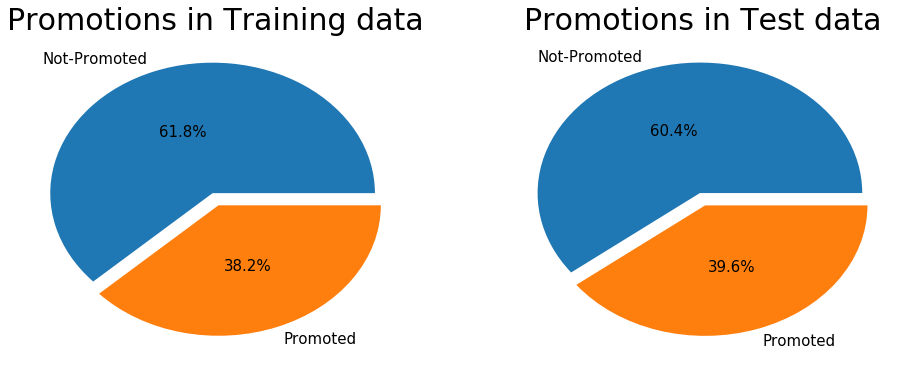

In [194]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

lable_font_size = 30
textprops = {"fontsize":15}
labels = {'Not-Promoted': 0, 'Promoted': 1}
train_promo_count = train_df["Promo"].value_counts().to_frame()
axs[0].pie(data=train_promo_count,
           x='Promo',
           autopct="%.1f%%",
           explode=[0.05]*2,
           labels=labels,
           pctdistance=0.5,
           textprops=textprops,
           )
axs[0].set_label(labels)
#train data
axs[0].set_title('Promotions in Training data', fontsize=lable_font_size)

test_promo_count = test_df["Promo"].value_counts().to_frame()
axs[1].pie(data=test_promo_count,
           x='Promo',
           autopct="%.1f%%",
           explode=[0.05]*2,
           labels=labels,
           pctdistance=0.5,
           textprops=textprops,
           )

#test data
axs[1].set_title('Promotions in Test data', fontsize=lable_font_size)

### Sales behavior before, during and after holidays

In [195]:
christmas = train_df.query("StateHoliday=='c'")
christmas_dates = christmas.groupby('Date')['Date'].unique().index
christmas_dates = pd.to_datetime(christmas_dates)
print(f"There are {christmas_dates.shape[0]} christmas_dates\n{christmas_dates}")

There are 4 christmas_dates
DatetimeIndex(['2013-12-25', '2013-12-26', '2014-12-25', '2014-12-26'], dtype='datetime64[ns]', name='Date', freq=None)


In [196]:
group_by_date = merged_train.groupby('Date')[['Customers', 'Sales', 'SalesPerCustomer']]
group_by_date = group_by_date.sum()
group_by_date.head()

,Customers,Sales,SalesPerCustomer
Date,,,
2013-01-01,19491,97235,84.826752
2013-01-02,834075,6949829,9708.032399
2013-01-03,761040,6347820,9709.819394
2013-01-04,782137,6638954,9818.033076
2013-01-05,687472,5951593,9971.772244


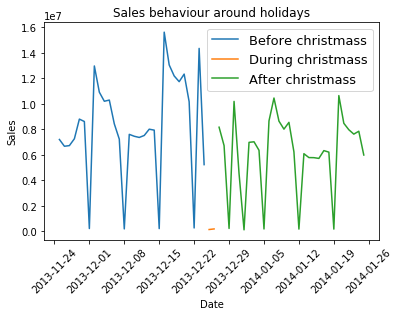

In [207]:
before_christmass_idx = group_by_date[group_by_date.index < christmas_dates[0]].index[-30:]
after_christmass_idx = group_by_date[group_by_date.index > christmas_dates[1]].index[:30]
during_christmass_idx = christmas_dates[:2]
before_christmass = group_by_date[group_by_date.index.isin(before_christmass_idx)]
after_christmass = group_by_date[group_by_date.index.isin(after_christmass_idx)]
during_christmass = group_by_date[group_by_date.index.isin(during_christmass_idx)]

sns.lineplot(x=before_christmass.index, y=before_christmass['Sales'])
sns.lineplot(x=during_christmass.index, y=during_christmass['Sales'])
ax = sns.lineplot(x=after_christmass.index, y=after_christmass['Sales'])
ax.set_title("Sales behaviour around holidays")
plt.xticks(rotation = 45) 
ax.legend(['Before christmass', 'During christmass', 'After christmass'], fontsize=13)

Assumptions
- The CompetitionOpenSinceMonth missing values are due to those compititors are already available before Pharmaceutical starts, since we have no information in which month it starts, let's just fill it with the 1st month
- The dataset value CompetitionOpenSinceYear column holds ranged from 1900 - 2015. Let us assume the compititors are preexisted before, and let us fill the missing values with the initial year (1990)
- Fill missing Promo2SinceWeek column with 0
- Fill missing Promo2SinceYear column with 0

### Any seasonal (Christmas, Easter etc) purchase behaviours

In [198]:
store_df['PromoInterval'].unique().tolist()

[nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec']

### StateHoliday

In [199]:
christmas = train_df.query("StateHoliday=='c'")
christmas_dates = christmas.groupby('Date')['Date'].unique().values
print(f"There are {christmas_dates.shape[0]} christmas_dates")
christmas_dates = [a[0] for a in christmas_dates.tolist()]

easter = train_df.query("StateHoliday=='b'")
easter_dates = easter.groupby('Date')['Date'].unique().values
print(f"There are {easter_dates.shape[0]} easter_dates")
easter_dates = [a[0] for a in easter_dates.tolist()]

public_holiday = train_df.query("StateHoliday=='a'")
public_holiday_dates = public_holiday.groupby('Date')['Date'].unique().values
print(f"There are {public_holiday_dates.shape[0]} public_holiday_dates")
public_holiday_dates = [a[0] for a in public_holiday_dates.tolist()]

There are 4 christmas_dates
There are 6 easter_dates
There are 27 public_holiday_dates


### Correlation between Customers and sales 

Text(0.5,1,'Correlation map of selected sales and store features')

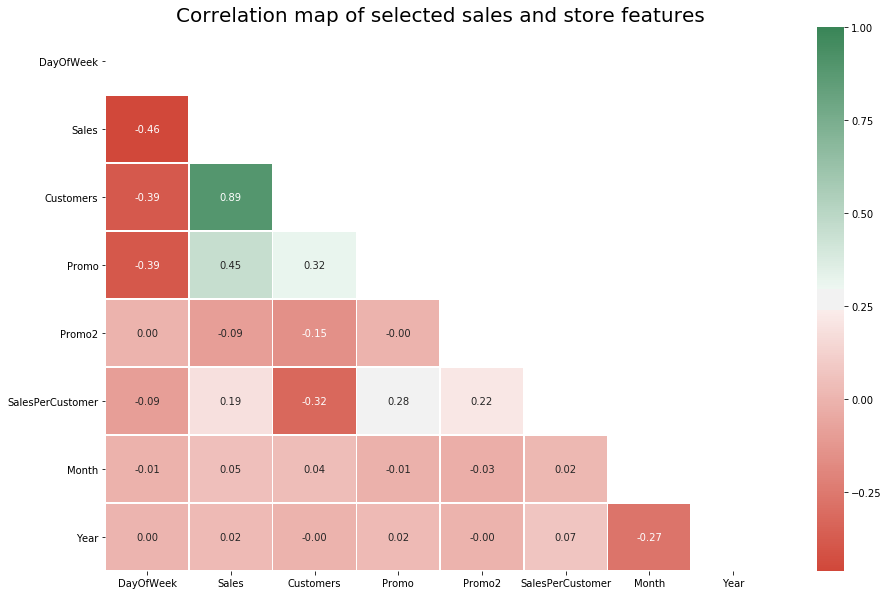

In [200]:
df_correlation = merged_train[['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
                           'Promo2', 'SalesPerCustomer', 'Month', 'Year',
                           'StateHoliday', 'Assortment', 'StoreType',
                           'PromoInterval']]

df_correlation=df_correlation.drop('Open', axis = 1)
upper_triangle = np.zeros_like(df_correlation.corr(), dtype=bool)
upper_triangle[np.triu_indices_from(upper_triangle)] = True
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_correlation.corr(),
            ax=ax,
            annot=True,
            mask=upper_triangle,
            fmt='.2f',
            linewidths=0.5,
            cmap=sns.diverging_palette(15, 500, as_cmap=True))
ax.set_title("Correlation map of selected sales and store features", fontsize=20)

### Effects of Promo on 

In [201]:
grouped_by_promo = train_df.query("Sales>0 & Customers>0 & Open==1").groupby('Promo')['Sales'].describe().transpose()
grouped_by_promo

Promo,0,1
count,467463.000000,376875.000000
mean,5929.826183,8228.739731
std,2629.269229,3175.253594
min,46.000000,133.000000
25%,4242.000000,6070.000000
50%,5459.000000,7650.000000
75%,7004.000000,9686.000000
max,41551.000000,38722.000000


Text(0.5,1,'Average Sales vs Promo')

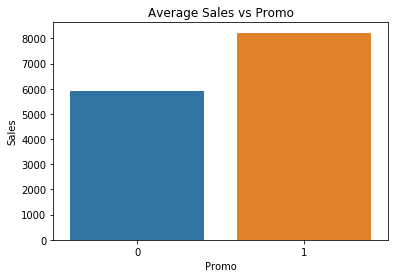

In [202]:
mean_sale_promo = train_df.query("Sales>0 & Customers>0 & Open==1").groupby('Promo')['Sales'].mean().to_frame()
ax = sns.barplot(data=mean_sale_promo, x=mean_sale_promo.index, y='Sales')
ax.set_title("Average Sales vs Promo")

Text(0.5,1,'Total Customers vs Promo')

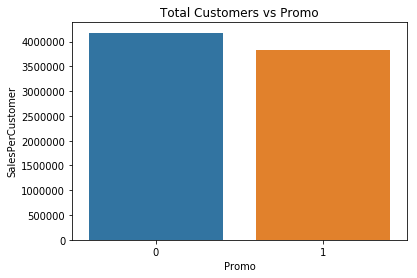

In [203]:
total_customers_promo = merged_train.query("Sales>0 & Customers>0 & Open==1").groupby('Promo')['SalesPerCustomer'].sum().to_frame()
ax = sns.barplot(data=total_customers_promo, x=total_customers_promo.index, y='SalesPerCustomer')
ax.set_title("Total Customers vs Promo")

### Promos be deployed that effective ways

In [204]:
grouped_by_store = train_df.groupby('Store')[['Sales', 'Customers']].sum()
grouped_by_store.head()

,Sales,Customers
Store,,
1,3716854,440523
2,3883858,457855
3,5408261,584310
4,7556507,1036254
5,3642818,418588


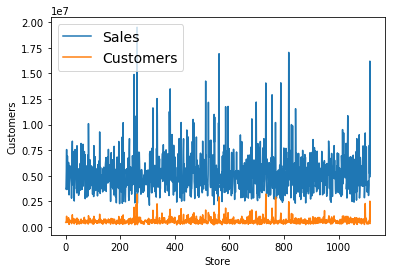

In [205]:
sns.lineplot(data=grouped_by_store, x=grouped_by_store.index, y='Sales')
sns.lineplot(data=grouped_by_store, x=grouped_by_store.index, y='Customers')
plt.legend(['Sales', 'Customers'], fontsize=14)

### Stores are opened on all weekdays and the effect sales on weekends

In [206]:
stores are opened on all weekdays and the effect sales on weekends

SyntaxError: invalid syntax (<ipython-input-206-801556e21ae0>, line 1)

In [ ]:
stores_open_on_weekdays = train_df.query("Open==1")['Store'].unique()
sales_stores_open_on_weekdays = train_df[(train_df["Store"].isin(stores_open_on_weekdays) &train_df['Open']==1 & ~train_df['DayOfWeek'].isin([6,7]))].groupby('Store')['Sales'].sum()
sns.lineplot(data=sales_stores_open_on_weekdays)
sales_stores_open_on_weekdays = train_df[(train_df["Store"].isin(stores_open_on_weekdays) &train_df['Open']==1 & train_df['DayOfWeek'].isin([6,7]))].groupby('Store')['Sales'].sum()
sns.lineplot(data=sales_stores_open_on_weekdays)
plt.legend(['Weekday', 'Weekend'], fontsize=14, loc='upper right')

### Assortment affects sales

In [ ]:
grouped_by_year_assortment = merged_train.groupby(['Assortment'])['Sales'].mean().to_frame()
ax = sns.barplot(x=grouped_by_year_assortment.index, 
            y=grouped_by_year_assortment['Sales'].values,
            # xlabel="Assortment", 
            # ylabel='Sales sum per Assorment', 
            # title='Sales grouped by Assortment'
            )
ax.set_ylabel('Sales sum per Assorment')
ax.set_title('Sales grouped by Assortment')
plt.legend(fontsize=12)
# grouped_by_year_assortment['Sales'].values

### Distance to the next competitor affect sales and its competitors all happen to be in city centres

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# comp_dist = scaler.fit_transform(
comp_dist = merged_train.groupby('Store')[['CompetitionDistance']].min()#)[:, 0]
# store_sales = scaler.fit_transform(
store_sales = merged_train.groupby('Store')[['Sales']].mean()#)[:, 0]


ax=sns.scatterplot(x=comp_dist.values[:, 0], y=store_sales.values[:, 0])
ax.set_ylabel('Sales')
ax.set_xlabel('CompetitionDistance')